# Relatorio TP1
  ## Feito por: 
    - Artur Parede     A46347
    - Duarte Domingues A45140
    - Pedro Henriques  A45415

## Antes de começar

Neste relatório iremos usar o matplotlib para dispor as imagens de modo a permitir que os resultados sejam visiveis mais explicitamente. No primeiro exercicio colocamos como ver imagens usando a biblioteca OpenCV. Os resultados são independentes da janela em que estes são exibidos.

De seguida iremos importar as bibliotecas utilizadas no resto do trabalho. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

import math, os, sys, re

### Ex 1: Abrir uma imagem e visualizar utilizando o OpenCV/Matplotlib

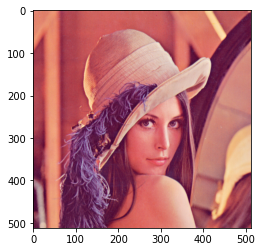

tipo uint8
formato (512, 512, 3)


In [2]:
x_img = cv2.imread("lenac.tif")
img_rgb = cv2.cvtColor(x_img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
#cv2.imshow( 'Original Image' , x_img )
print("tipo " + str(x_img.dtype))
print("formato " + str(x_img.shape))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Podemos verificar que os valores estão armazenados em int de 8 bits, unsigned, assim podemos guardar valores entre 0 a 255, permitindo aproximadamente 1.6*10^7 combinações possiveis de cores na imagem, utilizando os 3 planos de cor.

Assim os 3 planos de cor ficam representados na forma em como a imagem é armazenada, temos as dimensões do ficheiro (512 por 512) e os 3 planos correspondentes ás cores Vermelha (R), Verde(G), Azul(B).

### Ex2 : Verificar qualidade de imagem com diferentes taxas de compresão e calcular SNR e PSNR

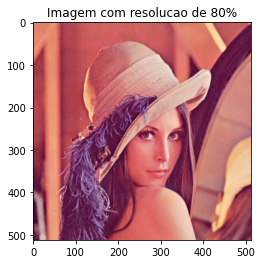

Tamanho do ficheiro com qualidade de 80% - 44196
SNR - 28.438337203730395
PSNR - 33.57655190479399


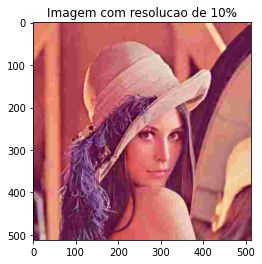

Tamanho do ficheiro com qualidade de 10% - 9558
SNR - 22.386688237389798
PSNR - 27.520525204421347

Tamanho do ficheiro com qualidade de 100% - 786814


In [3]:
def PSNR(imgAmostrada,imgOriginal):
    """Calcula o PSNR"""
    MSE = np.mean((imgOriginal.astype("uint16") - imgAmostrada.astype("uint16")) ** 2 )
    return 20*math.log10(255.0) - 10*math.log10(MSE)


def SNR(imgAmostrada,imgOriginal):
    try:
        k = np.sum(np.sum((imgAmostrada*1.0)**2))/(np.sum(np.sum(((imgAmostrada*1.0)-(imgOriginal*1.0))**2)))
        return 10*np.log10(k)
    except ZeroDivisionError:
        return "Infinito, ficheiro recebido igual ao emitido"




cv2.imwrite('file1.jpg', x_img, (cv2.IMWRITE_JPEG_QUALITY, 80))
cv2.imwrite('file2.jpg', x_img, (cv2.IMWRITE_JPEG_QUALITY, 10))

img_80 = cv2.imread("file1.jpg")
img_10 = cv2.imread("file2.jpg")

img_80_rgb = cv2.cvtColor(img_80, cv2.COLOR_BGR2RGB)
img_10_rgb = cv2.cvtColor(img_10, cv2.COLOR_BGR2RGB)

plt.imshow(img_80_rgb)
plt.title('Imagem com resolucao de 80%')
plt.show()
print("Tamanho do ficheiro com qualidade de 80% - " + str(os.path.getsize("file1.jpg")))
print("SNR - " + str(SNR(img_80, x_img)))
print("PSNR - " + str(PSNR(img_80, x_img)))



plt.imshow(img_10_rgb)
plt.title('Imagem com resolucao de 10%')
plt.show()
print("Tamanho do ficheiro com qualidade de 10% - " + str(os.path.getsize("file2.jpg")))
print("SNR - " + str(SNR(img_10, x_img)))
print("PSNR - " + str(PSNR(img_10, x_img)))

print("\nTamanho do ficheiro com qualidade de 100% - " + str(os.path.getsize("lenac.tif")))

Assim podemos verificar, comparando com a imagem original em, formato tif, a qualidade de imagem dimunuiu conforme se aumenta a compressão. No entanto o tamanho do ficheiro é reduzido, sendo por isso tolerável enviar informações com um ruido maior, se esta permitir, que seja poupada largura de banda ao enviar os ficheiros.

## Ex 3&4 : Converter para tons de cinzento e verificar o histograma

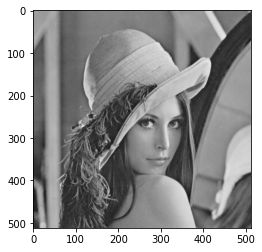

Tamanho do ficheiro greyscale- 263222
Tamanho do ficheiro original- 786814


In [4]:
x_img_g = cv2.cvtColor(x_img , cv2.COLOR_BGR2GRAY)
cv2.imwrite('file3.bmp',x_img_g)
plt.imshow(cv2.cvtColor(x_img_g, cv2.COLOR_BGR2RGB))
plt.show()


print("Tamanho do ficheiro greyscale- " + str(os.path.getsize("file3.bmp")))
print("Tamanho do ficheiro original- " + str(os.path.getsize("lenac.tif")))

Como mencionado no enunciado o metodo cvtColor(img, COLOR_BGR2GRAY) aplica uma transformacao que corresponde a uma equacao, em que multiplica em cada pixel, as 3 componentes da cor por uma constante distinta. A constante leva em consideração diversos fatores entre os quais o numero de cones alocados áquela cor em particular, assim as cores que possuem mais cones, é lhes dado um maior peso (em particular a cor verde. Assim atribuimos, um valor maior ás cores mais visiveis ao olho humano, dando uma aparencia mais natural ás imagens em tons de cinza.

Assim, podemos verificar que houve uma redução de 33% do tamanho da imagem, resultante da compressão dos 3 planos de cor, para apenas 1 que representa o tom de cinza.

De notar que foi novamente, necessaria efetuar uma conversão de BGR para RGB devido ao modo como a biblioteca OpenCV lê imagens. Caso esta conversão não fosse aplicada, a imagem surgiria em tons de verde. 

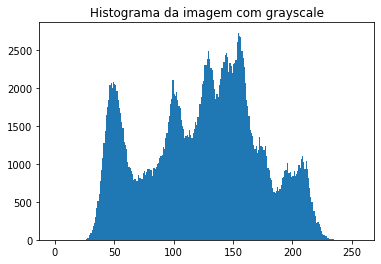

In [5]:
shape = x_img_g.shape
plt.hist(x_img_g.ravel(),256,[0,256])
plt.title("Histograma da imagem com grayscale")
plt.show()



### EX 5: Operações sobre pixeis

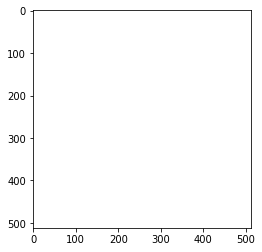

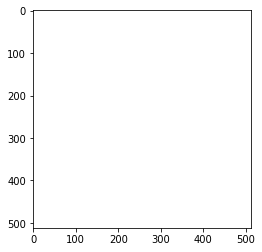

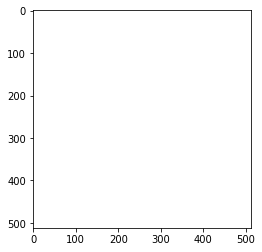

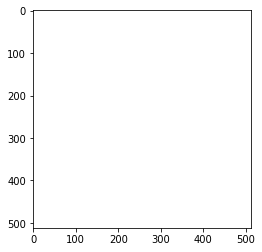

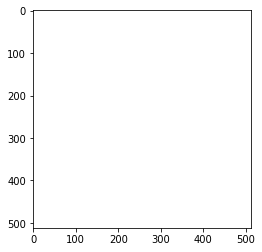

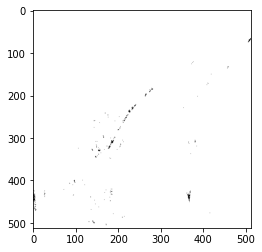

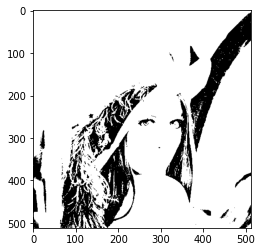

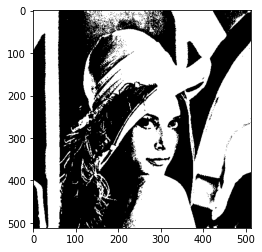

In [6]:
i=1
while(i<2**8):
    plt.imshow(cv2.cvtColor(np.float32(x_img_g>i), cv2.COLOR_BGR2RGB))
    plt.show()
    i+=i


   ### EX6 : Dithering

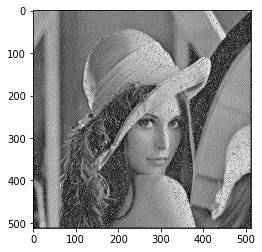

In [7]:
def dither(imgOriginal):
    img = np.copy(imgOriginal)
    
    
    height,width = img.shape
    imgOut = np.zeros(img.shape,np.uint8)
    for i in range(height - 1): 
        for j in range(width - 1): 
            oldImg = img.item(i,j)

            newImg = 255 if oldImg >127 else 0  
            imgOut.itemset(i,j,newImg)
            calcErro = oldImg - newImg
            img.itemset(i,j+1,img.item(i,j+1) + calcErro * (7/16))
            img.itemset(i+1,j+1,img.item(i+1,j+1) + calcErro * (3/16))
            img.itemset(i+1,j,img.item(i+1,j) + calcErro *  (5/16))
            img.itemset(i+1,j-1,img.item(i+1,j-1) + calcErro * (1/16))
            
    return imgOut

y = dither(x_img_g)
plt.imshow(cv2.cvtColor(y, cv2.COLOR_BGR2RGB))
plt.show()

### EX7 Salvar como binario

In [8]:
def saveImageBin(path, sinal):
    array = (sinal.ravel() / 255).astype('uint8')
    arrayBytes = re.findall(r"[01]{8}", ''.join(map(str, array)))

    ficheiro = open(path, "wb")
    for i in arrayBytes:
        ficheiro.write(bytes([int(i, 2)]));
    ficheiro.close()
    return 


saveImageBin('originalBin.txt', x_img)
saveImageBin('DitherBin.txt', y)

tamanhoOriginal = os.path.getsize('originalBin.txt')
tamanhoDither =os.path.getsize('DitherBin.txt')
print('Tamanho ficheiro original - ' + str(tamanhoOriginal))
print('Tamanho ficheiro depois dither - ' + str(tamanhoDither))
print('Taxa de compressao - ' + str(tamanhoOriginal/tamanhoDither))

print('SNR ' + str(SNR(cv2.cvtColor(y, cv2.COLOR_BGR2RGB), x_img)))
print('PSNR ' + str(PSNR(cv2.cvtColor(y, cv2.COLOR_BGR2RGB),x_img)))

Tamanho ficheiro original - 98304
Tamanho ficheiro depois dither - 32768
Taxa de compressao - 3.0
SNR 2.9105220249100308
PSNR 6.091147422375457


Comparando os ficheiros podemos ver que o ficheiro em tons de cinza, ocupa mais memória que o ficheiro que o ficheiro onde foi aplicado o dithering. Tal deve-se ao facto de estarmos a dar a ideia de que existem tons de cinza, onde na realidade, estes não existem. A segunda imagem, apenas dá essa ilusao através do quantidade de pixeis pretos numa determinada zona do ecrã, reduzindo assim a quantidade de informação armazenada para um unico bit por pixel. 

### EX 8

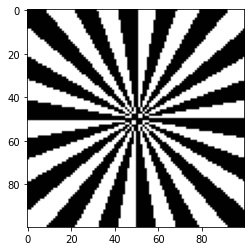

In [14]:
def function(img, angle=1):
    centro1 = len(img)/2
    centro2 = len(img)/2
    
    for y in range(len(img)):
        for x in range(len(img[y])):
            vectorx = x - centro1
            vectory = y - centro2

            alpha = np.degrees(math.atan2(vectorx, vectory))

            if(alpha%(angle*2)>=0 and alpha%(angle*2)<=angle):
                img[y][x] = 1
                



img = np.zeros([100,100,3],dtype=np.uint8)
img.fill(255)
function(img, 10)

#cv2.imwrite('Ex8.jpg', img)
#cv2.imshow('Ex8.jpg', img)

plt.imshow(img)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()